<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/CHAPTER_13_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [487]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Ex 1 and 2

In [524]:
def model(s,t):

    # state variables 
    x1 = s[0]
    x2 = s[1]

    dx1dt = -x1 
    dx2dt = -4*x2 

    return [dx1dt, dx2dt]

### Which is the steady state?

$$
x_1 = 0
$$

$$
x_2 = 0
$$

In [525]:
A = np.matrix([[1, 0],[0, 4]])

In [526]:
eigenval, eigenvec = np.linalg.eig(A)

In [527]:
print(eigenvec)

[[1. 0.]
 [0. 1.]]


In [528]:
# initial conditions 
s = [1, 2]

In [529]:
# integration time 
t = np.linspace(0,10,100)

In [530]:
# solve odes 
out = odeint(model, s, t)

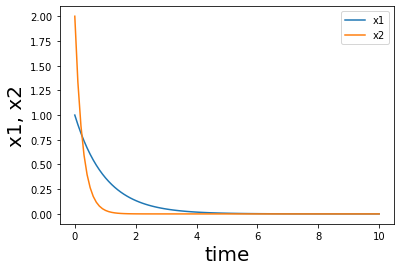

In [531]:
# show results 
plt.plot(t,out)
plt.xlabel("time", size = 20)
plt.ylabel("x1, x2", size = 20)
plt.legend(["x1","x2"])

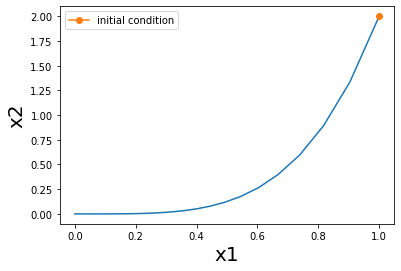

In [532]:
plt.plot(out[:,0],out[:,1])
plt.xlabel("x1", size = 20)
plt.ylabel("x2", size = 20)
plt.plot(1,2,"o-", label = "initial condition")
plt.legend()

In [533]:
x = np.linspace(-10,10,5)
ic = np.empty((len(x)**2,2))

In [534]:
c = 0
for i in range(len(x)):
    for j in range(len(x)):
        ic[c] = [x[i], x[j]]
        c = c + 1

In [535]:
type(ic)

numpy.ndarray

In [536]:
out = []

In [537]:
for i in range(ic.shape[0]):
    if i == 0:
        out = odeint(model, ic[i,], t)
    else:
        out = np.column_stack((out, odeint(model, ic[i,], t)))    

Text(0, 0.5, 'x1, x2')

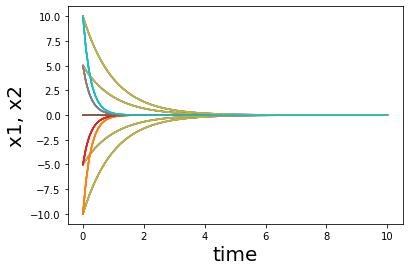

In [538]:
plt.plot(t, out)
plt.xlabel("time", size = 20)
plt.ylabel("x1, x2", size = 20)

In [539]:
out.shape

(100, 50)

(-20.0, 20.0)

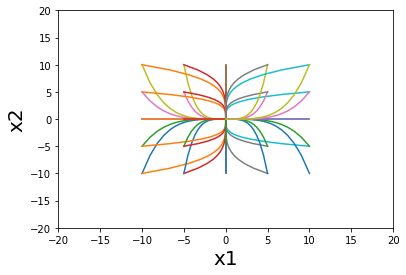

In [540]:
for i in range(out.shape[1]-1):
    plt.plot(out[:,i], out[:,i+1])

plt.xlabel("x1", size = 20)
plt.ylabel("x2", size = 20)
plt.xlim(-20,20)
plt.ylim(-20,20)

### Ex 3 

In [541]:
def model(s,t):

    # state variables 
    x1 = s[0]
    x2 = s[1]

    dx1dt = 2*x1 + x2
    dx2dt = 2*x1 - x2

    return [dx1dt, dx2dt]

In [542]:
A = np.matrix([[2,1],[2,-1]])

In [543]:
eigenval, eigenvec = np.linalg.eig(A)

In [544]:
print(eigenval)

[ 2.56155281 -1.56155281]


In [545]:
print(eigenvec)

[[ 0.87192821 -0.27032301]
 [ 0.48963374  0.96276969]]


In [546]:
ic = np.empty((len(x)**2,2))


In [547]:
c = 0
for i in range(len(x)):
    for j in range(len(x)):
        ic[c] = [x[i], x[j]]
        c = c + 1

In [548]:
out = []
ic.shape

(25, 2)

In [549]:
for i in range(ic.shape[0]):
    if i == 0:
        out = odeint(model, ic[i], t)
    else:
        out = np.column_stack((out, odeint(model, ic[i],t)))

In [550]:
out.shape

(100, 50)

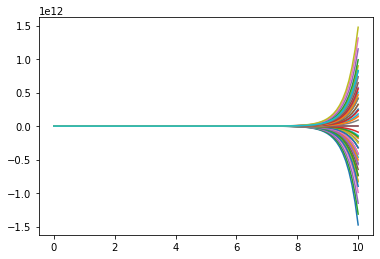

In [551]:
plt.plot(t, out)

(-20.0, 20.0)

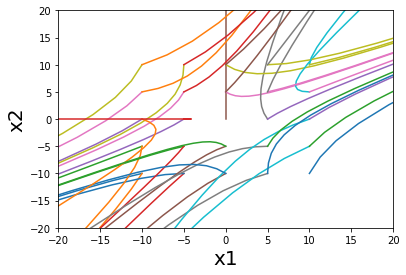

In [552]:
for i in range(out.shape[1]-1):
    plt.plot(out[:,i], out[:,i+1])

plt.xlabel("x1", size = 20)
plt.ylabel("x2", size = 20)
plt.xlim(-20,20)
plt.ylim(-20,20)